In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

**Load wine dataset**

In [3]:
from sklearn.datasets import load_wine

In [4]:
data = load_wine()

**Covert wine dataset into a dataframe**

In [5]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

**Display the dataframe**

In [6]:
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

**Display the number of rows and columns**

In [7]:
print(df.shape)

(178, 14)


**Split the dataset df into two separate variables, features and classLabels**

In [8]:
features = df.drop("target", axis=1)
classLabels = df["target"]

**Shuffle the rows**

In [9]:
features = features.sample(frac=1, random_state=0)
classLabels = classLabels.sample(frac=1, random_state=0)

**Ensure that the indices of the two variables "features" and "classLabels" match**

In [10]:
assert all(features.index == classLabels.index)

**20% of the data will be used for testing and 80% will be used for training.**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(features, classLabels, test_size=0.2, random_state=0)

**Train the decision tree**

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier = decision_tree.fit(x_train, y_train)

**Create a graph visualisation**

In [15]:
from sklearn.tree import plot_tree

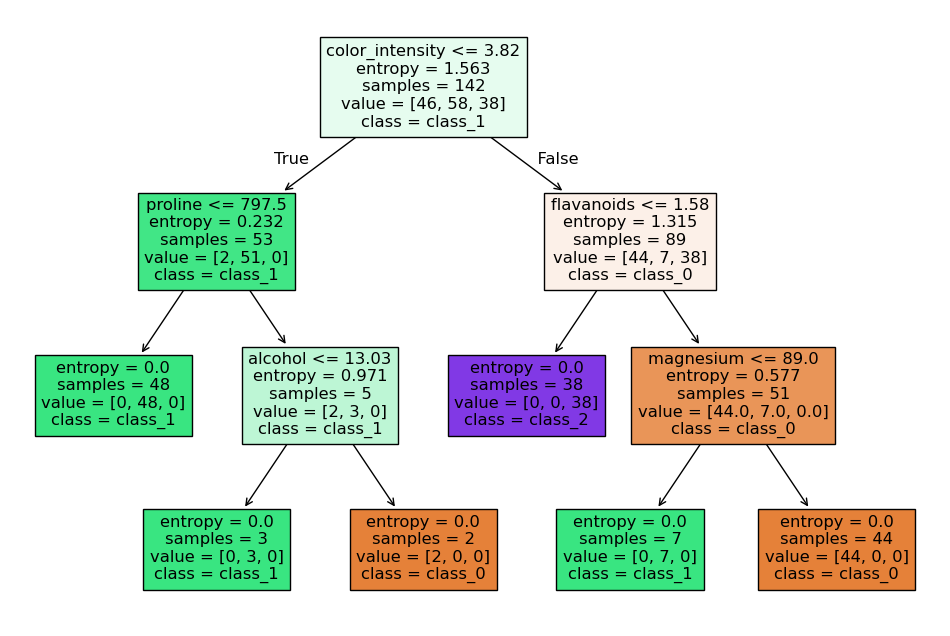

In [16]:
plt.figure(figsize=(12, 8))
plot_tree(classifier, feature_names=features.columns, class_names=data.target_names, filled=True)
plt.show()

**Saved the decision tree graph visualisation in the working directory as a PDF named output_graph.**

In [17]:
plt.savefig('output_graph.pdf')

<Figure size 640x480 with 0 Axes>

**Test the decision tree**

In [18]:
predictions = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

**Calculate performance metrics of the decision tree**

**Accuracy**

In [19]:
def computeAccuracy(target, predicted):
    accuracy = (predictions == target).sum()/len(target)
    return accuracy

accuracy = computeAccuracy(y_test, predictions)
print(accuracy)

0.8888888888888888


**Recall score**

In [20]:
from sklearn.metrics import recall_score

In [21]:
recall = recall_score(y_test, predictions, average='macro')
print(recall)

0.8974358974358975


**Precision score**

In [22]:
from sklearn.metrics import precision_score

In [23]:
precision = precision_score(y_test, predictions, average='macro')
print(precision)

0.8917748917748917
